In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
housing = pd.read_csv("data.csv")

In [5]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# housing.hist(bins = 50, figsize=(20, 15))

In [10]:
# this is just for learning purpose, to understand in detail otherwise all these are already done in sklearn


# def split_train_test(data, test_ratio):
    # np.random.seed(42)  # this function fix the test data.
    # shuffled = np.random.permutation(len(data))
    # print(shuffled)
    # test_set_size = int(len(data) * test_ratio )
    # test_indices = shuffled[:test_set_size]
    # train_indices = shuffled[test_set_size:]
    # return data.iloc[train_indices], data.iloc[test_indices]

# train_set, test_set = split_train_test(housing, 0.2)
# print(len(train_set), len(test_set))
# print(f"rows in train set: {len(train_set)}\nrows in test set: {len(test_set)}")


In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size= 0.2, random_state=42) 
print(f"rows in train set: {len(train_set)}\nrows in test set: {len(test_set)}")

rows in train set: 404
rows in test set: 102


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [14]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [15]:
# 95/7

In [16]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [17]:
# housing = strat_train_set.copy # To make copy before looking correlation and any kind of change

## looking for correlations

In [18]:
corr_matrix = housing.corr()

In [19]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV        1.000000
RM          0.695360
ZN          0.360445
B           0.333461
DIS         0.249929
CHAS        0.175260
AGE        -0.376955
RAD        -0.381626
CRIM       -0.388305
NOX        -0.427321
TAX        -0.468536
INDUS      -0.483725
PTRATIO    -0.507787
LSTAT      -0.737663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

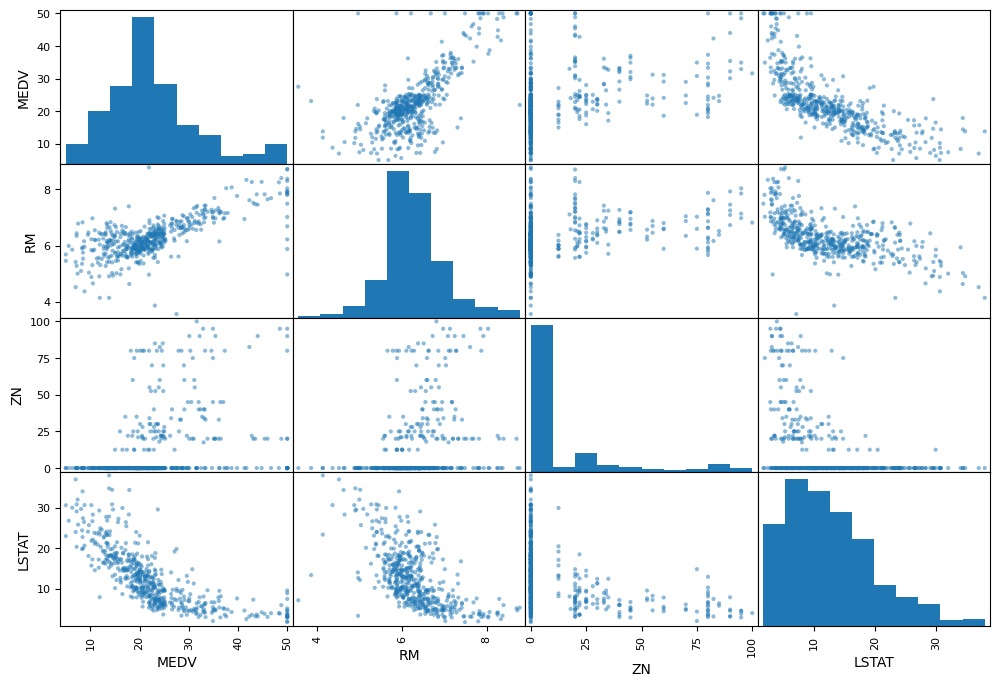

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes],figsize = (12, 8))


<Axes: xlabel='RM', ylabel='MEDV'>

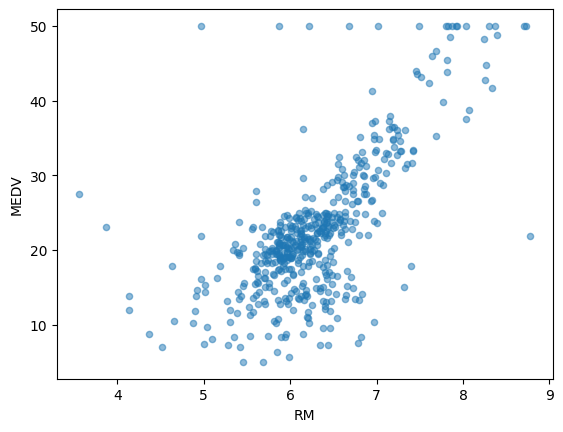

In [21]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.5 )

## testing out attribute combinations

In [22]:
housing["TAXRM"]= housing["TAX"]/housing["RM"]

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


<Axes: xlabel='TAXRM', ylabel='MEDV'>

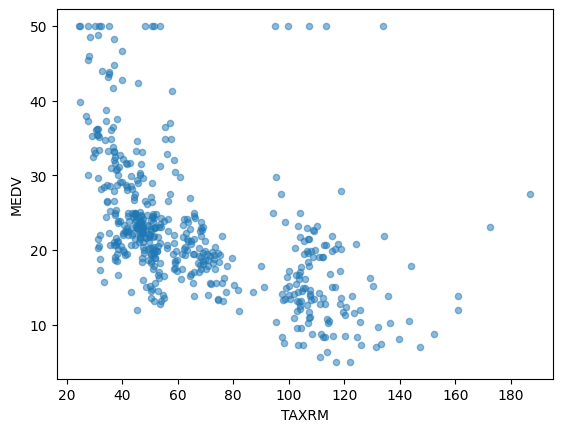

In [24]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.5 )

In [25]:
housing = strat_train_set.drop("MEDV", axis= 1) # to drop 'medv' column 
housing_labels = strat_train_set["MEDV"].copy()


## scikit-learn design 

# creating pipeline

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [27]:
my_pipeline = Pipeline ([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [28]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [29]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [30]:
housing_num_tr.shape

(404, 13)

# selecting a desired model

In [31]:
# using these models one by one - and comment that later after noting %error to choose a model with minimum error.
# 1st model = LinearRegression()
# 2nd model =  decision tree
# 3rd model =  LinearRegression() with crossvalidation
# 4th model = RandomForestRegressor

In [32]:
from sklearn.linear_model import LinearRegression
# model = LinearRegression()

In [33]:
from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()


In [34]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [35]:
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [36]:
some_data = housing.iloc[:5]

In [37]:
some_labels = housing_labels.iloc[:5]


In [38]:
prepared_data = my_pipeline.transform(some_data)  

In [39]:
model.predict(prepared_data)

array([22.468, 25.27 , 16.616, 23.33 , 23.65 ])

In [40]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [41]:
# some_labels

# evaluating the model

In [42]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)


In [43]:
lin_mse

1.5319106658415818

In [44]:
# error = 0 that mean our model is overfitting

# using better evaluation technique - crossvalidation

In [45]:
# 1 2 3 4 5 6 7 8 9 10

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10 )

rmse_scores = np.sqrt(-scores)

In [46]:
rmse_scores

array([2.81757918, 2.82584565, 4.26851365, 2.6124369 , 3.45793292,
       2.64816237, 4.46154671, 3.31154612, 2.93204771, 3.49131982])

In [47]:
def print_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean)
    print("standard deviation: ", scores.std())




In [48]:
print_scores(rmse_scores)

scores:  [2.81757918 2.82584565 4.26851365 2.6124369  3.45793292 2.64816237
 4.46154671 3.31154612 2.93204771 3.49131982]
mean:  <built-in method mean of numpy.ndarray object at 0x000001ADB07C9C50>
standard deviation:  0.619392440360351


## saving the model

In [54]:
from joblib import dump, load
dump( model, 'price_prediction.joblib' ) # saving model so that we can directly use this model after loading this file

['price_prediction.joblib']

## testing the model

In [50]:
from sklearn.metrics import mean_squared_error
x_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)


In [51]:
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(y_test))


[24.918 11.928 25.642 21.723 18.228 15.028 20.417 14.909 32.432 41.805
 19.948 11.644 25.398 29.227 19.575 10.833 31.733 14.516 23.522 18.662
 19.391 17.877 18.68  21.777 18.748 31.062 15.98  32.618  9.048 33.636
 23.304 21.454 22.921 10.969 21.046 10.815 43.198 24.588 23.496 42.3
 23.944 31.022 20.413 20.911 19.021 33.746 43.93  19.893 20.308 21.63
 21.38  14.921 22.056 15.509 24.983 32.708 41.566 28.504 19.887 20.717
 46.037  9.966 19.274 25.69  14.962 32.781 19.813 18.18  19.119 34.28
 24.528 22.684 21.342 22.558 35.07  12.956 15.95  20.103 20.704 21.301
 22.99  21.178 13.944 22.936 20.756 21.168 13.956 21.256 22.179 23.178
 18.145 26.651  7.304 27.131 18.965 29.245 20.041 30.902 14.389 27.156
 21.149 20.664] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41

In [52]:
final_rmse

2.9823668880441185

In [53]:
# prepared_data [0]